In [ ]:
import requests
import ipywidgets as w
import random
from IPython import display as disp
import pandas as pd
from IPython.display import clear_output

# Fetch all ingredients from the API
def fetch_ingredients():
    url = 'https://www.thecocktaildb.com/api/json/v1/1/list.php?i=list'
    response = requests.get(url)
    data = response.json()
    ingredients = [item['strIngredient1'] for item in data['drinks']]
    return sorted(ingredients)

all_ingredients = fetch_ingredients()

# Shared Widgets
glass_description = w.Label('Pick the glass type you want:')
glass = w.Dropdown(
    options=['Cocktail glass','Collins glass','Old-fashioned glass','Margarita glass','Highball glass','Coffee mug'],
    disabled=False,
)

alcoholic_description = w.Label('Pick the alcoholic type you want:')
alcoholic = w.Dropdown(
    options=['Alcoholic','Non Alcoholic'],
    disabled=False,
)

instruction_tab1 = w.Label("Keep clicking the button until getting a satisfying result!")

ingredient_description = w.Label('Pick your desired ingredient:')
total_ingredients = w.Dropdown(options=all_ingredients)

ingredient1_description = w.Label('Pick your first ingredient:')
ingredient1 = w.Dropdown(options=all_ingredients)
ingredient2_description = w.Label('Pick your second ingredient:')
ingredient2 = w.Dropdown(options=all_ingredients)

# Buttons
playbutton = w.Button(description="Click to search for Cocktails")
playbutton1 = w.Button(description = "Click to search for Cocktails")
playbutton2 = w.Button(description = 'Click to get drink')

# Layout Outputs
searchoutput1 = w.Output()
with searchoutput1:
  display(glass_description, glass)
  display(alcoholic_description, alcoholic)
  display(ingredient1_description, total_ingredients)
  display(playbutton1)

searchoutput = w.Output()
with searchoutput:
  display(glass_description, glass)
  display(alcoholic_description, alcoholic)
  display(ingredient1_description, ingredient1)
  display(ingredient2_description, ingredient2)
  display(playbutton)

labeloutput = w.Output()
labeloutput1 = w.Output()

canvas = w.Output()
with canvas:
  display(instruction_tab1)
  display(searchoutput1)
  display(labeloutput1)

canvas_1 = w.Output()
with canvas_1:
  display(searchoutput)
  display(labeloutput)

popular_description = w.Label("If you don't have any ideas about what to choose, we can generate one from our popular drink list")
labeloutput2 = w.Output()

canvas_2 = w.Output()
with canvas_2:
   display(popular_description)
   display(playbutton2)
   display(labeloutput2)

# display the drink's name, image, instruction, ingredients
# Sometimes there won't be instruction/ingredients (good luck)
def display_drink_full(drink, output_area):
    output_area.clear_output()

    # Extract data
    name = drink.get('strDrink', 'Unknown')
    img_url = drink.get('strDrinkThumb', '')
    instructions = drink.get('strInstructions', 'No instructions available.')

    # Build ingredients
    ingredients = []
    for i in range(1, 16):
        ing = drink.get(f'strIngredient{i}')
        meas = drink.get(f'strMeasure{i}')
        if ing:
            full = f"{meas.strip() if meas else ''} {ing}".strip()
            ingredients.append(full)

    # Render output
    with output_area:
        display(disp.Image(url=img_url, width=300))
        display(w.Label(value=f"The drink we pick for you is {name}"))
        display(w.HTML("<b>How to make it:</b>"))
        display(w.Label(value=instructions))
        display(w.HTML("<b>Ingredients:</b>"))
        for ing in ingredients:
            display(w.Label(value=f"- {ing}"))

# One Ingredient DIY
def apisearch1(change):
    labeloutput1.clear_output(wait=True)
    site = 'https://www.thecocktaildb.com/api/json/v2/9973533/filter.php'

    r1 = requests.get(site, {'g': glass.value}).json()
    r3 = requests.get(site, {'a': alcoholic.value}).json()
    r4 = requests.get(site, {'i': total_ingredients.value}).json()

    drinklist = []

    for d1 in r1['drinks']:
        for d3 in r3['drinks']:
            if d1['strDrink'] == d3['strDrink']:
                if r4['drinks'] != "None Found":
                    for d4 in r4['drinks']:
                        if d1['strDrink'] == d4['strDrink']:
                            drinklist.append(d1['strDrink'])

    with labeloutput1:
        if drinklist:
            pick = random.choice(drinklist)
            r = requests.get('https://www.thecocktaildb.com/api/json/v2/9973533/search.php', {'s': pick}).json()
            if drinklist:
              pick = random.choice(drinklist)
              r = requests.get('https://www.thecocktaildb.com/api/json/v2/9973533/search.php', {'s': pick}).json()
              drink = r['drinks'][0]

              display_drink_full(drink, labeloutput1)

        else:
            display(w.Label("Sorry, no drinks match your criteria."))

playbutton1.on_click(apisearch1)

# Two Ingredients DIY
def apisearch(change):
    labeloutput.clear_output(wait=True)
    site = 'https://www.thecocktaildb.com/api/json/v2/9973533/filter.php'

    r1 = requests.get(site, {'g': glass.value}).json()
    r3 = requests.get(site, {'a': alcoholic.value}).json()
    r4 = requests.get(site, {'i': f"{ingredient1.value},{ingredient2.value}"}).json()

    drink_list1 = []

    for d1 in r1['drinks']:
        for d3 in r3['drinks']:
            if d1['strDrink'] == d3['strDrink']:
                if r4['drinks'] != "None Found":
                    for d4 in r4['drinks']:
                        if d1['strDrink'] == d4['strDrink']:
                            drink_list1.append(d1['strDrink'])

    with labeloutput:
        if drink_list1:
            display_drink_full(r['drinks'][0], labeloutput)
        else:
            display(w.Label("Sorry, no drinks match your criteria."))

playbutton.on_click(apisearch)

# Popular Drink
def apipopular(change):
   labeloutput2.clear_output(wait=True)
   r3 = requests.get('https://www.thecocktaildb.com/api/json/v2/9973533/randomselection.php').json()
   random_popular = random.choice(r3['drinks'])
   image = disp.Image(url=random_popular['strDrinkThumb'], width=250)

   with labeloutput2:
      display_drink_full(random_popular, labeloutput2)

playbutton2.on_click(apipopular)

# A/B Testing Tab
ab_glass = w.Dropdown(options=glass.options, description='Glass:')
ab_alcoholic = w.Dropdown(options=alcoholic.options, description='Alcohol:')
ab_ingredient = w.Dropdown(options=all_ingredients, description='Ingredient:')
ab_button = w.Button(description='Show Two Drinks')
ab_vote = w.RadioButtons(options=['A', 'B'], description='Choose:')
ab_submit = w.Button(description='Submit Vote')
ab_output = w.Output()
ab_result = w.Output()
ab_votes_df = pd.DataFrame(columns=['Ingredient', 'Glass', 'Alcoholic', 'Choice', 'Drink A', 'Drink B'])

def ab_search(change):
    ab_output.clear_output()
    ab_result.clear_output()
    site = 'https://www.thecocktaildb.com/api/json/v2/9973533/filter.php'

    ri = requests.get(site, {'i': ab_ingredient.value}).json()
    rg = requests.get(site, {'g': ab_glass.value}).json()
    ra = requests.get(site, {'a': ab_alcoholic.value}).json()

    di = set(d['strDrink'] for d in ri['drinks']) if ri['drinks'] else set()
    dg = set(d['strDrink'] for d in rg['drinks']) if rg['drinks'] else set()
    da = set(d['strDrink'] for d in ra['drinks']) if ra['drinks'] else set()
    valid = list(di & dg & da)

    if len(valid) >= 2:
        d1, d2 = random.sample(valid, 2)
        s_url = 'https://www.thecocktaildb.com/api/json/v2/9973533/search.php'
        i1 = requests.get(s_url, {'s': d1}).json()['drinks'][0]
        i2 = requests.get(s_url, {'s': d2}).json()['drinks'][0]

        img1 = w.Image(value=requests.get(i1['strDrinkThumb']).content, format='png', width=200)
        img2 = w.Image(value=requests.get(i2['strDrinkThumb']).content, format='png', width=200)

        ab_submit.drink_a = d1
        ab_submit.drink_b = d2

        with ab_output:
            display(w.HBox([
                w.VBox([w.Label(f"Drink A: {d1}"), img1]),
                w.VBox([w.Label(f"Drink B: {d2}"), img2])
            ]))

        # Show vote options only after drinks are displayed
        with ab_result:
            ab_result.clear_output()
            display(ab_vote, ab_submit)

    else:
        with ab_output:
            display(w.Label("Not enough drinks to compare."))

def submit_vote(change):
    global ab_votes_df
    ab_result.clear_output()
    if not ab_vote.value:
        with ab_result:
            display(w.Label("Please choose A or B before submitting.Thank u."))
        return

    new_vote = {
        'Ingredient': ab_ingredient.value,
        'Glass': ab_glass.value,
        'Alcoholic': ab_alcoholic.value,
        'Choice': ab_vote.value,
        'Drink A': ab_submit.drink_a,
        'Drink B': ab_submit.drink_b
    }
    ab_votes_df = pd.concat([ab_votes_df, pd.DataFrame([new_vote])], ignore_index=True)

    with ab_result:
        display(w.Label(f"Thank you! You chose: Drink {ab_vote.value}"))
    ab_vote.value = None

ab_button.on_click(ab_search)
ab_submit.on_click(submit_vote)

from collections import Counter

def score_drink(drink, liked_ingredients, liked_glass, liked_alcoholic):
    score = 0
    for i in range(1, 16):
        ing = drink.get(f'strIngredient{i}')
        if ing and ing in liked_ingredients:
            score += 1
    if drink.get('strGlass') == liked_glass:
        score += 1
    if drink.get('strAlcoholic') == liked_alcoholic:
        score += 1
    return score

from collections import Counter

def recommend_drink_from_votes(votes_df):
    if votes_df.empty:
        return None, "No votes yet to analyze."

    selected = votes_df.apply(
        lambda row: row['Drink A'] if row['Choice'] == 'A' else row['Drink B'], axis=1
    )

    liked_ingredients, liked_glasses, liked_alcoholics = [], [], []

    for drink_name in selected:
        r = requests.get('https://www.thecocktaildb.com/api/json/v2/9973533/search.php', params={'s': drink_name}).json()
        drink = r['drinks'][0]

        for i in range(1, 16):
            ing = drink.get(f'strIngredient{i}')
            if ing:
                liked_ingredients.append(ing)
        liked_glasses.append(drink.get('strGlass'))
        liked_alcoholics.append(drink.get('strAlcoholic'))

    top_ingredients = [i for i, _ in Counter(liked_ingredients).most_common(10)]
    top_glass = Counter(liked_glasses).most_common(1)[0][0]
    top_alcoholic = Counter(liked_alcoholics).most_common(1)[0][0]

    all_drinks = requests.get('https://www.thecocktaildb.com/api/json/v2/9973533/search.php?s=').json()
    candidates = all_drinks['drinks'][:30]  # limit for performance

    best = None
    best_score = -1
    for d in candidates:
        s = score_drink(d, top_ingredients, top_glass, top_alcoholic)
        if s > best_score:
            best = d
            best_score = s

    if best:
        return best, f"🎉 We recommend: {best['strDrink']} — {best['strInstructions']}"
    else:
        return None, "Sorry, no good recommendation found."

recommend_button = w.Button(description="~Get My Personalized Drink~")
recommend_output = w.Output()

def handle_recommendation(change):
    recommend_output.clear_output()
    drink, message = recommend_drink_from_votes(ab_votes_df)
    with recommend_output:
        if drink:
            if drink:
                image = w.Image(value=requests.get(drink['strDrinkThumb']).content, format='png', width=200)

                # Extract all alcohol-related ingredients
                alcohol_keywords = ['rum', 'vodka', 'gin', 'brandy', 'whiskey', 'tequila', 'scotch', 'bourbon', 'liqueur']
                alcohols_used = []

                for i in range(1, 16):
                    ing = drink.get(f'strIngredient{i}')
                    if ing and any(word.lower() in ing.lower() for word in alcohol_keywords):
                        alcohols_used.append(ing)

                alcohol_str = ", ".join(alcohols_used) if alcohols_used else "No alcohol detected"

                display_drink_full(drink, recommend_output)

            else:
                display(w.Label(value=message))

recommend_button.on_click(handle_recommendation)

ab_tab = w.Output()
with ab_tab:
    display(w.VBox([
        w.Label("Pick your preferences and compare two drinks:"),
        ab_glass,
        ab_alcoholic,
        ab_ingredient,
        ab_button,
        ab_output,
        ab_result,
        w.HTML("<hr>"),
        recommend_button,
        recommend_output
    ]))

# Tab Setup
tab = w.Tab()
tab.children = (canvas, canvas_1, canvas_2, ab_tab)
tab.set_title(0, 'One Ingredient DIY')
tab.set_title(1, 'Two Ingredients DIY')
tab.set_title(2, 'Drink on popular list')
tab.set_title(3, 'A/B Testing')

tab

In [ ]:
#save to csv file, remember to save it if you want!
ab_votes_df.to_csv('ab_test_votes.csv', index=False)

In [ ]:
#plot visualization for users' preferred glass type, alcohol preferences, and ingerdients 
def plot_vote_distribution(votes_df):
    import seaborn as sns
    import matplotlib.pyplot as plt
    from collections import Counter

    if votes_df.empty:
        print("No data yet to plot.")
        return

    # Get selected drinks from votes
    votes_df['Selected Drink'] = votes_df.apply(
        lambda row: row['Drink A'] if row['Choice'] == 'A' else row['Drink B'], axis=1
    )

    selected = votes_df['Selected Drink'].tolist()
    glasses, alcohols, ingredients = [], [], []

    for name in selected:
        r = requests.get('https://www.thecocktaildb.com/api/json/v2/9973533/search.php', params={'s': name}).json()
        if not r['drinks']:
            continue
        d = r['drinks'][0]
        glasses.append(d.get('strGlass'))
        alcohols.append(d.get('strAlcoholic'))
        for i in range(1, 16):
            ing = d.get(f'strIngredient{i}')
            if ing:
                ingredients.append(ing)

    # Style
    sns.set(style="whitegrid", font_scale=1.2)
    pastel = sns.color_palette("pastel")

    def plot_bar(data, title, color_idx=0, figsize=(9, 5)):
        plt.figure(figsize=figsize)
        sns.set_palette([pastel[color_idx]])
        ax = sns.barplot(x=data.index, y=data.values)
        plt.title(title, fontsize=16, fontweight='bold')
        plt.xticks(rotation=30, ha='right', fontsize=10)
        plt.yticks(fontsize=10)
        plt.ylabel("Votes", fontsize=12)
        plt.xlabel("")
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=10)
        plt.tight_layout()
        plt.show()
    # Charts
    plot_bar(pd.Series(glasses).value_counts().head(7), "Most Preferred Glass Types", color_idx=0)
    plot_bar(pd.Series(alcohols).value_counts(), "Alcohol Preferences", color_idx=1)
    plot_bar(pd.Series(ingredients).value_counts().head(10), "Top 10 Ingredients in Voted Drinks", color_idx=2)


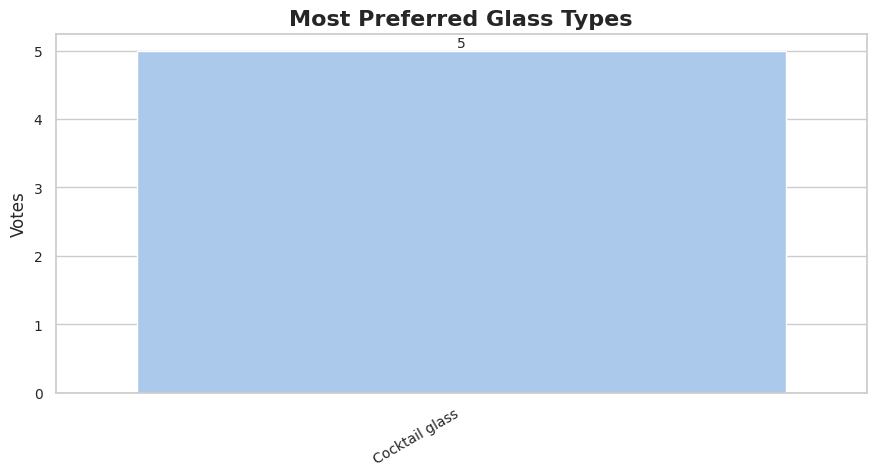

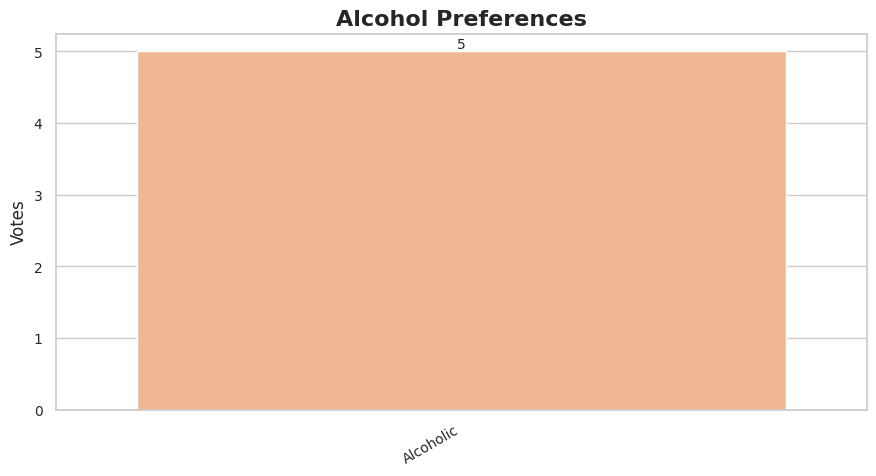

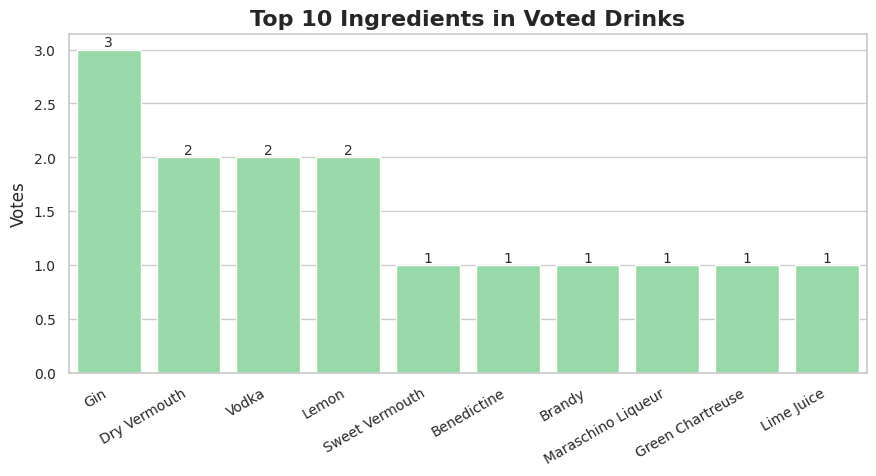

In [ ]:
#view the plot now
plot_vote_distribution(ab_votes_df)